In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Input, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

spam_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ai_school/data/spam.csv', encoding='latin1')

spam_data = spam_data.dropna(axis=1)
spam_data.columns = ["label", "mail"]

spam_data['label'] = spam_data['label'].replace('spam', 1)
spam_data['label'] = spam_data['label'].replace('ham', 0)

spam_data['mail'] = spam_data['mail'].str.replace("[^\w]", " ")

spam_data['mail'] = spam_data['mail'].replace('', np.nan)
spam_data['label'] = spam_data['label'].replace('', np.nan)

spam_data = spam_data.dropna(how='any')

print("# preprocessing done")


mail_train, mail_test, y_train, y_test = train_test_split(spam_data['mail'], spam_data['label'], test_size=0.2, shuffle=False)

print('# split done')


stopwords = ['a', 'an']

X_train = []
for stc in mail_train:
    token = []
    words = stc.split()
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_train.append(token)

X_test = []
for stc in mail_test:
    token = []
    words = stc.split()
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_test.append(token)

print('# tokenization done')

# preprocessing done
# split done
# tokenization done


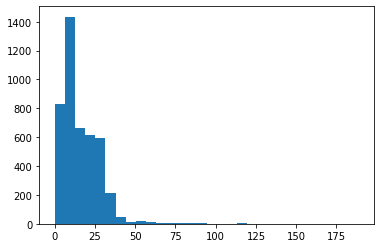

15.980031411263182
1435.0
189.0
[6.3]


In [4]:
# 문장 길이 시각화
# 문장의 최대 길이 구하기
import matplotlib.pyplot as plt

len_stc = []
for data in X_train:
    len_stc.append(len(data))

y, x, _ = plt.hist(len_stc, bins=30)
plt.show()
# print(_[1])
print(sum(len_stc)/len(len_stc))
print(y.max())
print(x.max())
print(x[np.where(y == y.max())])

In [5]:
# CNN 사용한 모델 구성
model = Sequential()
model.add(Embedding(5000, 256))
# 256개의 커널수, 커널의 크기는 3, padding은 valid면 그냥 줄어든 그대로 / same이면 padding을 해서 원래 input크기로 맞춤
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
# 그냥 maxpooling도 있지만 이때는 pool 사이즈랑 strides 를 명시해야하는데 global쓰면 명시안해도된다
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [6]:
# 스팸 데이터에 적용한 CNN 모델
model = Sequential()
model.add(Embedding(7792, 32))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [7]:
# 함수형 api를 사용한 합성 모델
# 함수형 케라스
inputs = Input(shape=(50,))
embed = Embedding(7792, 128)(inputs)

# 모델 합성
concat_layers = []

conv = Conv1D(256, 3, padding='valid', activation='relu')(embed)
pool = GlobalMaxPooling1D()(conv)
flat = Flatten()(pool)
concat_layers.append(flat)

conv = Conv1D(256, 4, padding='valid', activation='relu')(embed)
pool = GlobalMaxPooling1D()(conv)
flat = Flatten()(pool)
concat_layers.append(flat)

conv = Conv1D(256, 5, padding='valid', activation='relu')(embed)
pool = GlobalMaxPooling1D()(conv)
flat = Flatten()(pool)
concat_layers.append(flat)
######
concat = Concatenate()(concat_layers)

outputs = Dense(1, activation="sigmoid")(concat)

model = Model(inputs, outputs)

# 로이터 뉴스 카테고리 분류

In [8]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [9]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=128, epochs=1, validation_data=(X_test, y_test))

71/71 [==============================] - 25s 348ms/step - loss: 2.6234 - acc: 0.3366 - val_loss: 2.4162 - val_acc: 0.3620
